In [16]:
#Imporing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import imblearn


## Reading data file and cheking data

In [17]:
#reading source file
data=pd.read_csv("bank-full.csv")

In [18]:
#to check the head of the data-frame
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no



## Attribute information
### Input variables:

#### 1 - age (numeric)
#### 2 - job : type of job (categorical)
#### 3 - marital : marital status (categorical)
#### 4 - education (categorical)
#### 5 - default: has credit in default? (categorical)
#### 6 - balance(Numeric)
#### 7 - housing: has housing loan? (categorical)
#### 8 - loan: has personal loan? (categorical)
#### 9 - contact: contact communication type (categorical) 
#### 10 - day: last contact day of the month (numberical)
#### 11 - month: last contact month of year (categorical)
#### 12 - duration: last contact duration, in seconds (numeric). 

##### Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### 13 - campaign: number of contacts performed during this campaign and for this client (numeric)
#### 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
#### 15 - previous: number of contacts performed before this campaign and for this client (numeric)
#### 16 - poutcome: outcome of the previous marketing campaign (categorical)

### Output variable (desired target):
#### 21 - Target - has the client subscribed a term deposit? (binary: 'yes','no')


In [594]:
#checking the dtypes of the data
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object


##### There are object data-types in the data-set which would need conversion at the latter stage of our analysis

In [595]:
#Checking the information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [596]:
#Checking the shape of the data-set and the target column
print(data.shape)
data['Target'].value_counts()

(45211, 17)


no     39922
yes     5289
Name: Target, dtype: int64

##### We can infer that the data-set has 45211 records with 16 independent variables and 1 target variable where as 39922 people have not subscribed to term deposit whereas 5289 people have subscribed to term deposit

In [597]:
#To check if there are any null values present
nulllvalues=data.isnull().sum()
print(nulllvalues)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


##### There are no null values present in the data-set

In [598]:
#To check if there are any NaN values present
NaNvalues=data.isna().sum()
print(NaNvalues)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


##### There are no NaN values present in the data-set

In [599]:
Target_dict={'yes':1,'no':0}

data['Target']=data.Target.map(Target_dict)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [600]:
#To describe the data- Five point summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
Target,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


##### Mean of Campaign,Previous,Balance, Duration, pdays is much more than the median which infers that they have outliers

## Exploratory Data Analytics

### Univariate Analysis

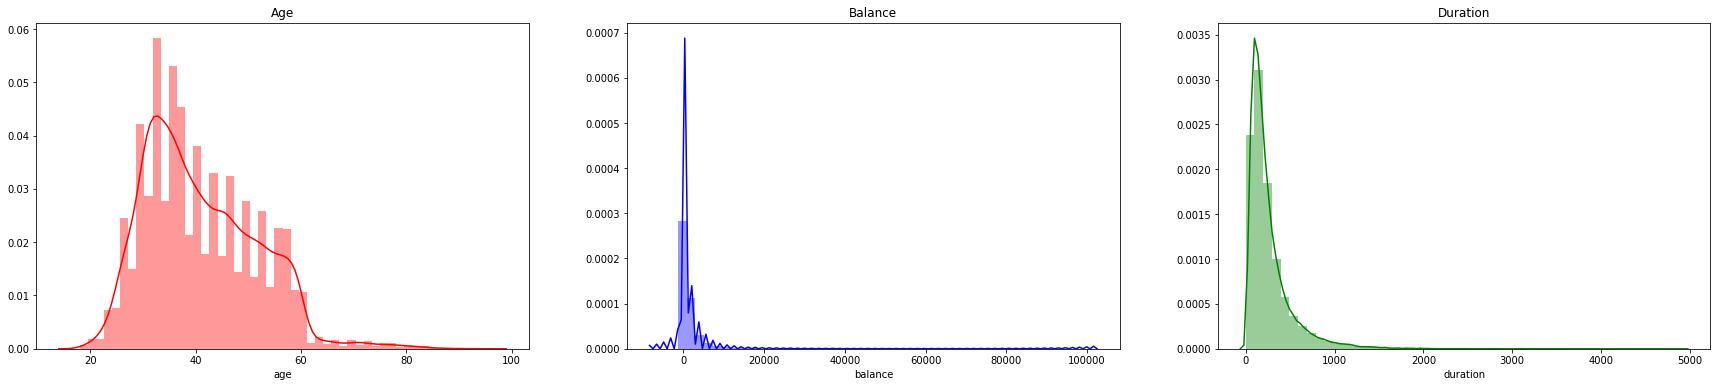

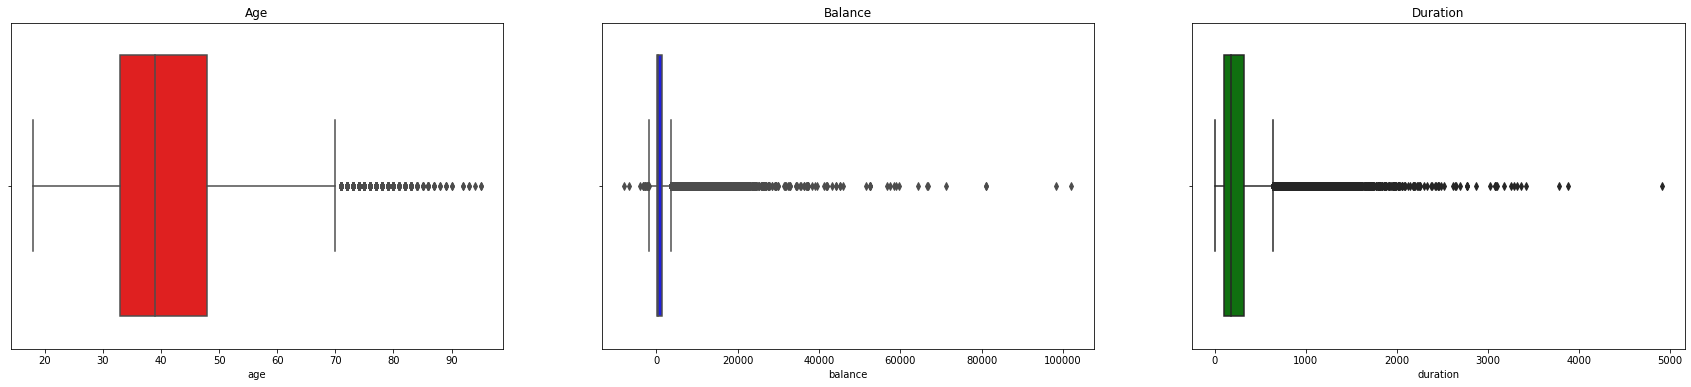

In [557]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('Age')
sns.distplot(data['age'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('Balance')
sns.distplot(data['balance'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('Duration')
sns.distplot(data['duration'],color='green')



plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('Age')
sns.boxplot(data['age'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('Balance')
sns.boxplot(data['balance'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('Duration')
sns.boxplot(data['duration'],orient='horizondal',color='green')


##### Average age is between 30 and 50 Years and there are some outliers
##### Average duration is between 0 and 800. Huge number of outliers and are right skewed
#####  Balance  is right skewed and have huge number of outliers 

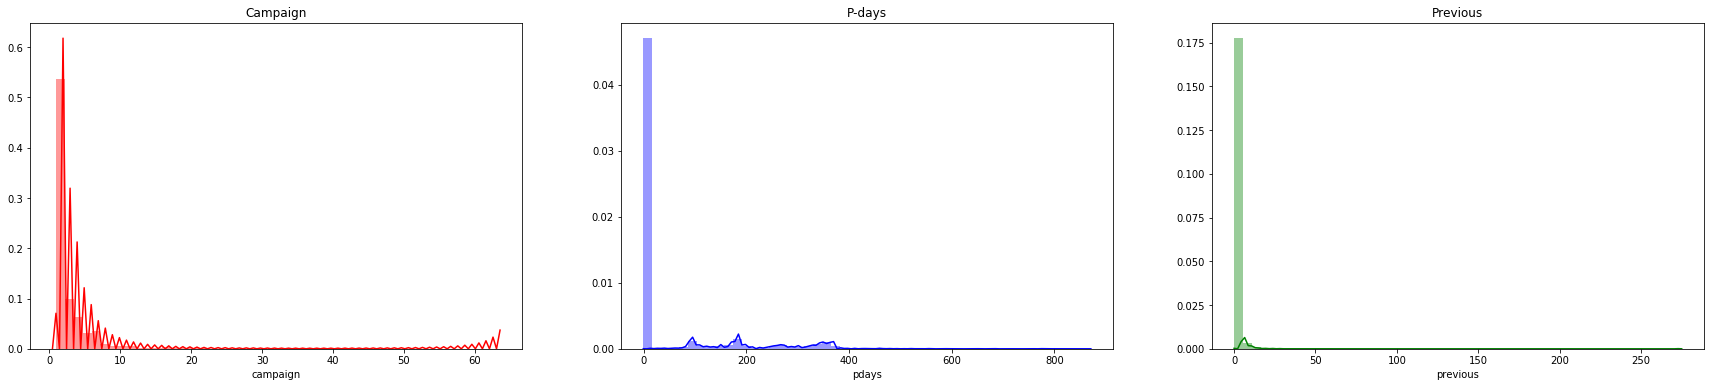

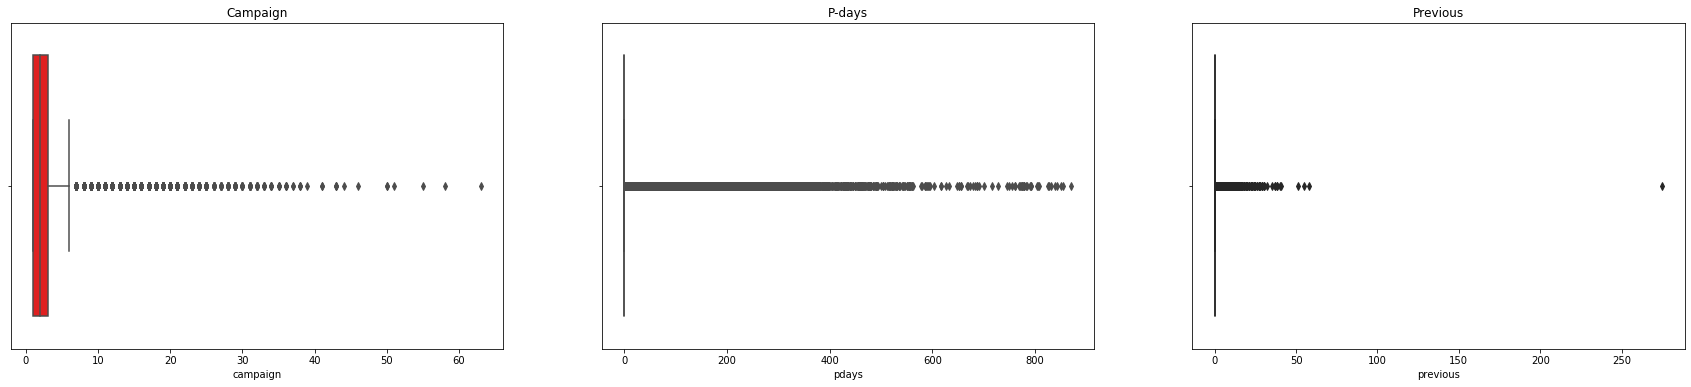

In [428]:
#Distribution of continous data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('Campaign')
sns.distplot(data['campaign'],color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('P-days')
sns.distplot(data['pdays'],color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('Previous')
sns.distplot(data['previous'],color='green')



plt.figure(figsize=(30,6))

#Subplot 1- Boxplot
plt.subplot(1,3,1)
plt.title('Campaign')
sns.boxplot(data['campaign'],orient='horizondal',color='red')

#Subplot 2
plt.subplot(1,3,2)
plt.title('P-days')
sns.boxplot(data['pdays'],orient='horizondal',color='blue')

#Subplot 3
plt.subplot(1,3,3)
plt.title('Previous')
sns.boxplot(data['previous'],orient='horizondal',color='green')


##### Average campaigns are around 2 with good number of outliers
#### pdays and previous data have huge number of outliers

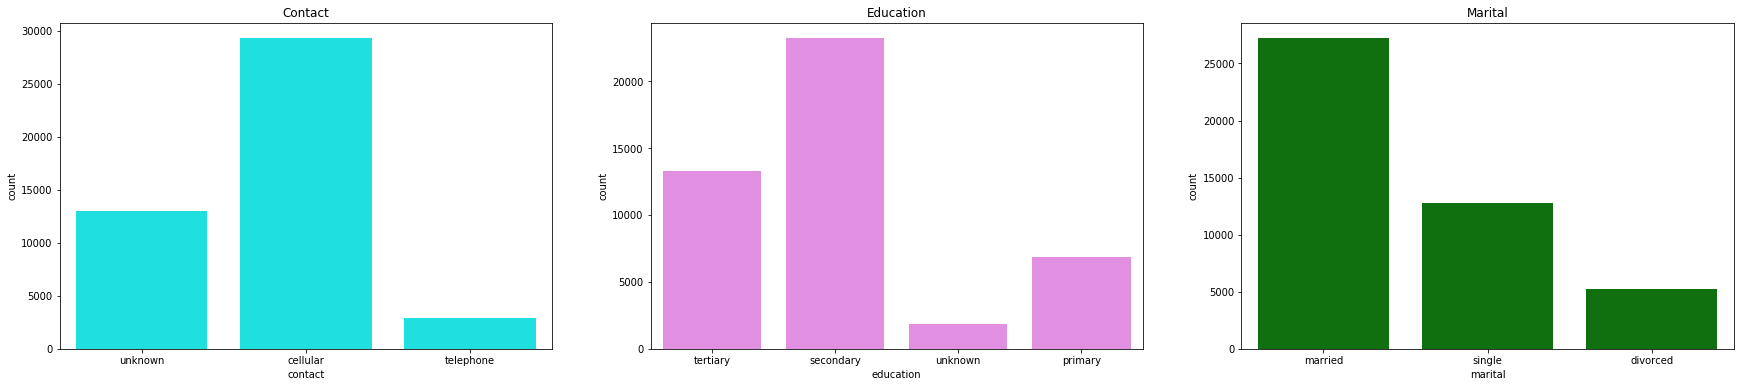

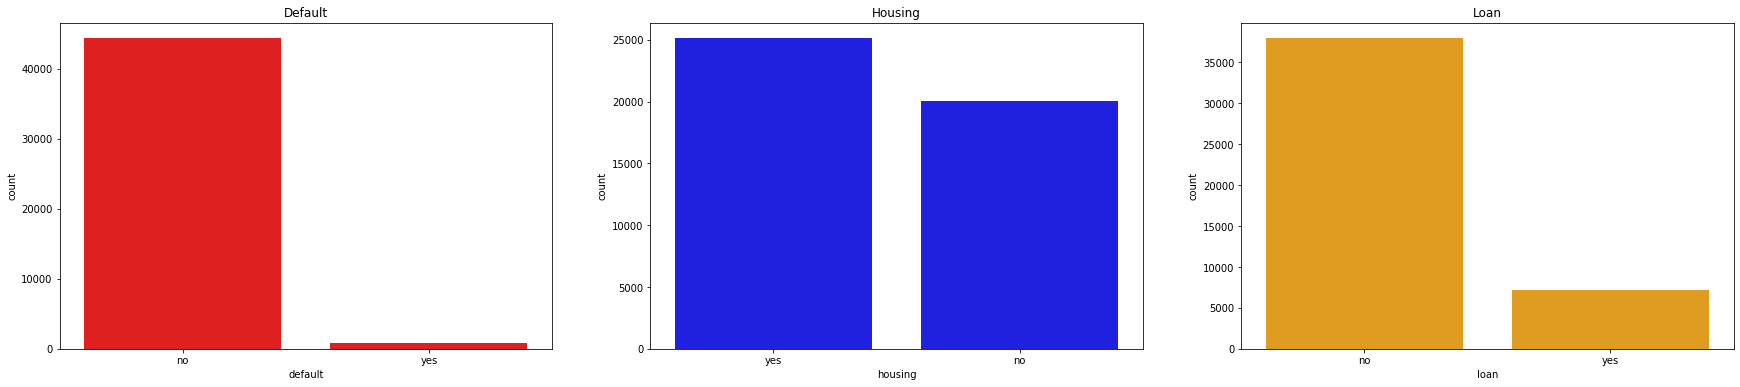

In [429]:
# Distribution of Categorical data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('Contact')
sns.countplot(data['contact'],color='cyan')

#Subplot 2
plt.subplot(1,3,2)
plt.title('Education')
sns.countplot(data['education'],color='violet')

#Subplot 3
plt.subplot(1,3,3)
plt.title('Marital')
sns.countplot(data['marital'],color='green')

plt.figure(figsize=(30,6))

#Subplot 4
plt.subplot(1,3,1)
plt.title('Default')
sns.countplot(data['default'],color='red')

#Subplot 5
plt.subplot(1,3,2)
plt.title('Housing')
sns.countplot(data['housing'],color='blue')

#Subplot 6
plt.subplot(1,3,3)
plt.title('Loan')
sns.countplot(data['loan'],color='orange')

#### Cellular way of contact is higher than other methods
#### Most of the customers have Secondary education followed by Tertiary education
#### Most of the customers in this data set are married
#### Most of the customers have not defaulted on their credit
#### People have housing loan is more
#### People not having personal loan is higher than people having personal loan

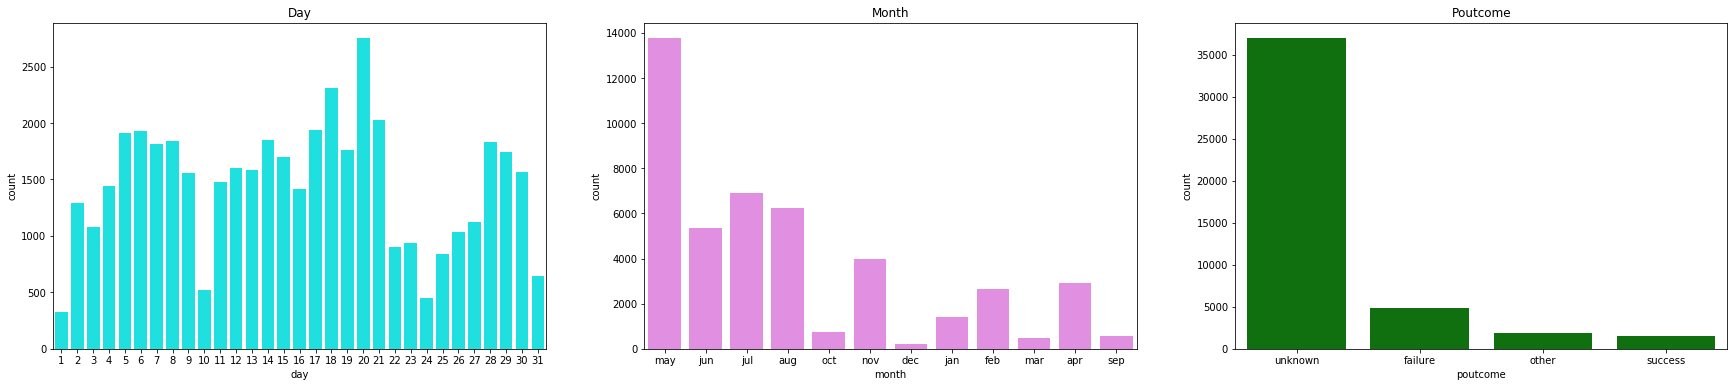

In [430]:
# Distribution of Categorical data

plt.figure(figsize=(30,6))

#Subplot 1
plt.subplot(1,3,1)
plt.title('Day')
sns.countplot(data['day'],color='cyan')

#Subplot 2
plt.subplot(1,3,2)
plt.title('Month')
sns.countplot(data['month'],color='violet')

#Subplot 3
plt.subplot(1,3,3)
plt.title('Poutcome')
sns.countplot(data['poutcome'],color='green')

#### May was the most last contacted month
#### Most of the outcome of the previous capaign was others

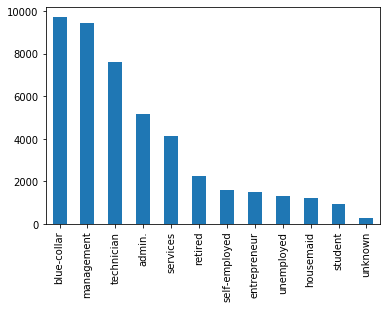

In [431]:
data['job'].value_counts().head(30).plot(kind='bar')

##### Blue collar and Management jobs are the highest followed by Technician

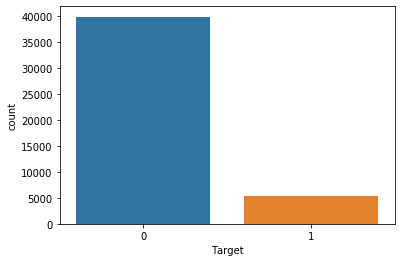

In [432]:
# Distribution of Target column
sns.countplot(data['Target'])

#### Target column is highly imbalanced with only close the 4000 people have taken term deposits

#### After filteration,around 5000 people have taken term deposits and 40000 have not taken term deposits. That is around 12.5% success rate.

## Bi-variate Aanalysis

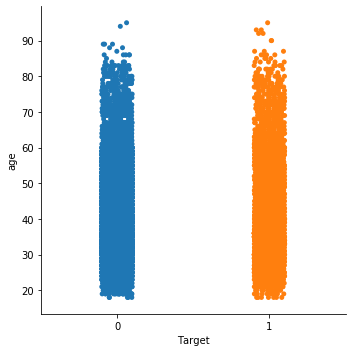

In [433]:
sns.catplot(x='Target',y='age', data=data)

#### Age doesnot seem to influence the target

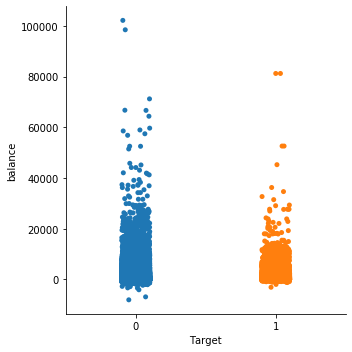

In [434]:
sns.catplot(x='Target',y='balance', data=data)

#### Balance has a slight influence on the target

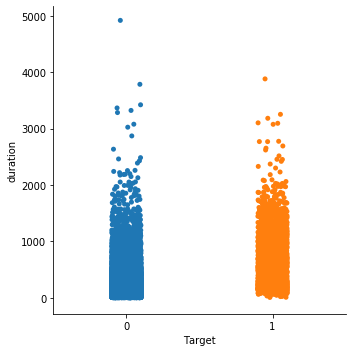

In [435]:
sns.catplot(x='Target',y='duration', data=data)

#### Duration doesnot have good corelation with the Target

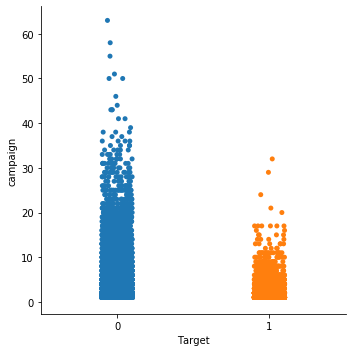

In [436]:
sns.catplot(x='Target',y='campaign', data=data)

#### Balance has an average relation with Target

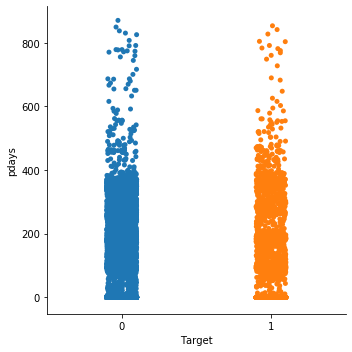

In [437]:
sns.catplot(x='Target',y='pdays', data=data)

#### pdays doesnot seem to influence the target

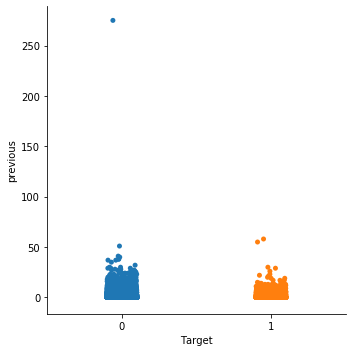

In [438]:
sns.catplot(x='Target',y='previous', data=data)

#### previous doesnot seem to influence the target

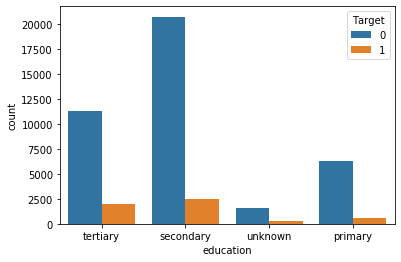

In [439]:
sns.countplot(x='education',hue='Target', data=data)

##### we can infer that people with secondary  and tertiary education  opt for term deposit comparitively

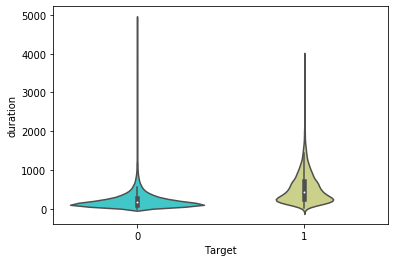

In [440]:
sns.violinplot(x="Target", y="duration", data=data,palette='rainbow')


##### Increase in duration of last call shows the variation in target output column

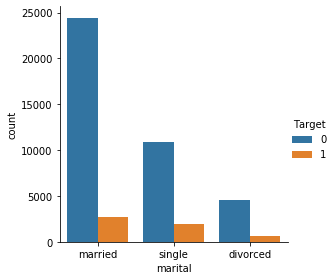

In [441]:
sns.catplot(x='marital',hue='Target',data=data,kind='count',height=4)

##### People with matital status as "single" invest in term deposit by their total percentage


## Multi-Variate Analysis

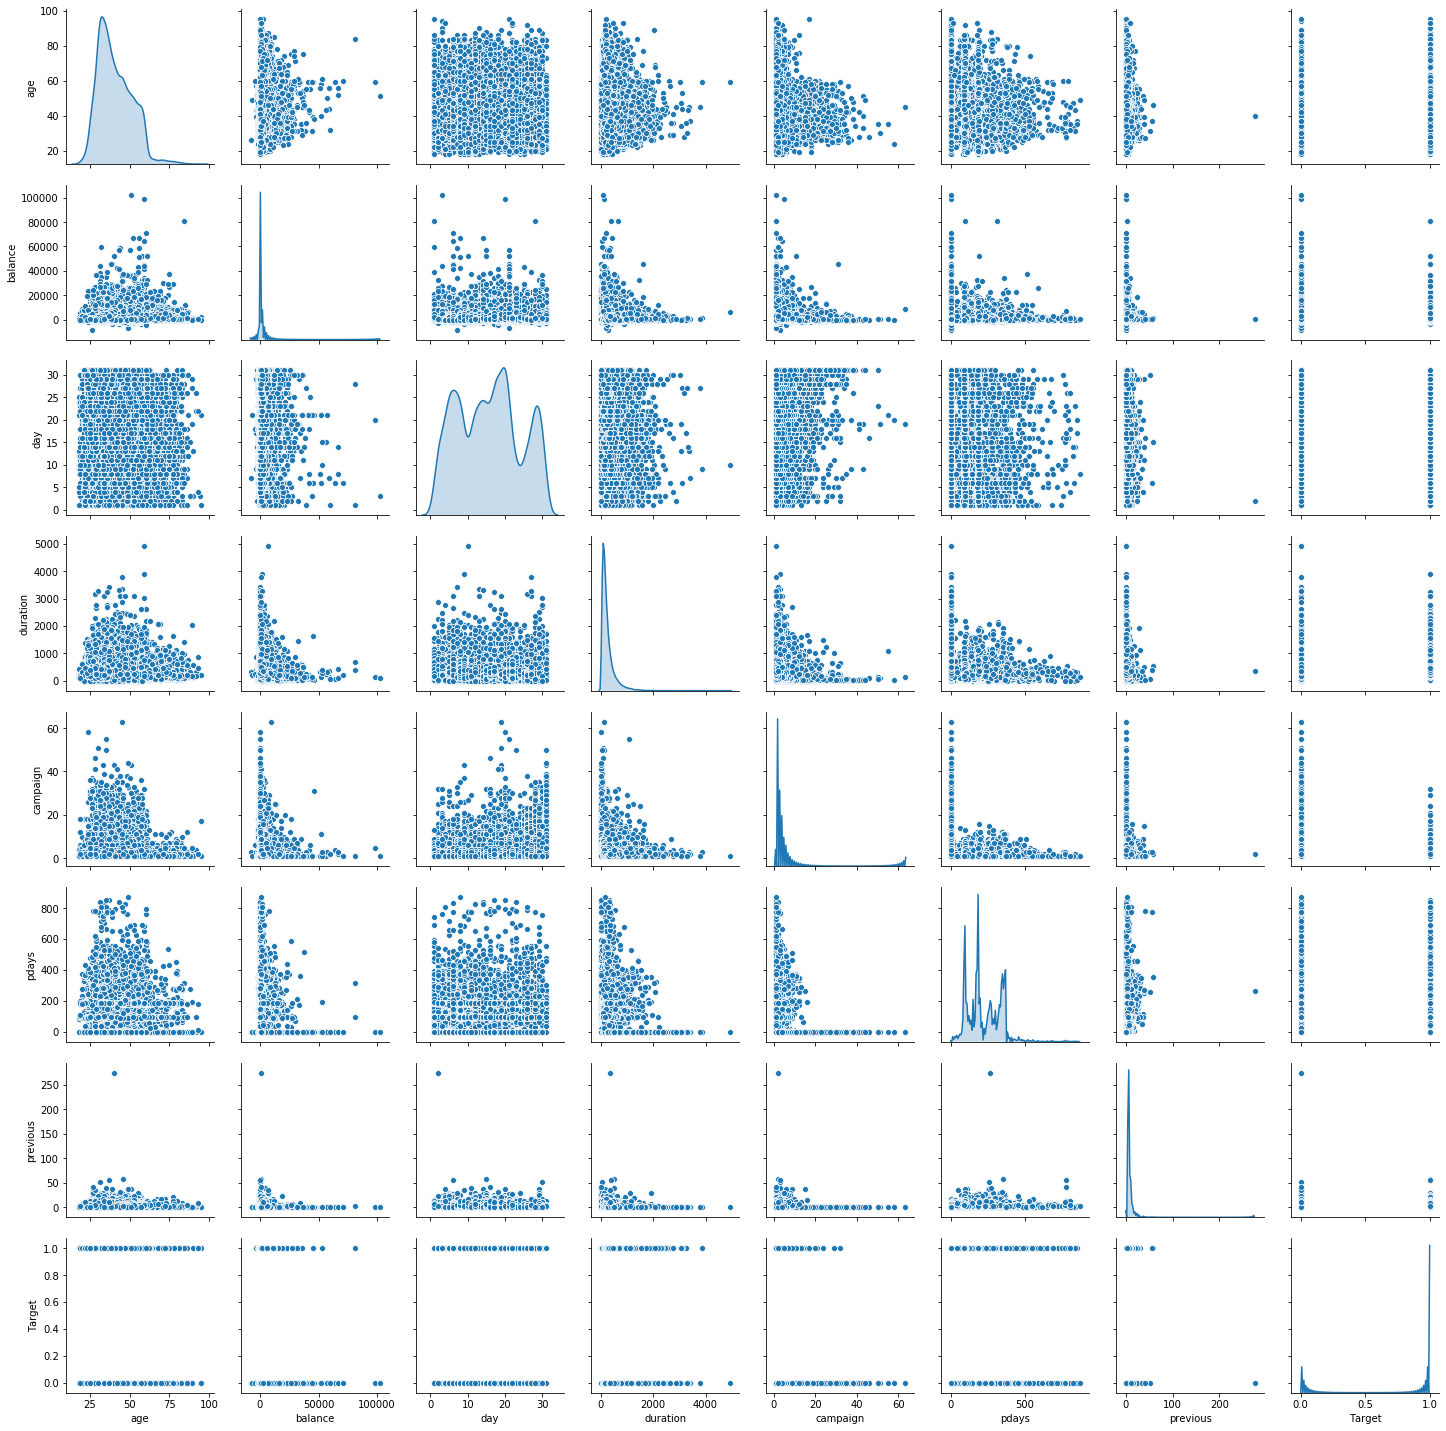

In [547]:
sns.pairplot(data, palette="Set2", diag_kind="kde", height=2.5)

In [442]:
#To find the correlation between the continous variables
correlation=data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,age,balance,day,duration,campaign,pdays,previous,Target
age,1,0.0977827,-0.00912005,-0.00464843,0.00476031,-0.023758,0.00128832,0.025155
balance,0.0977827,1,0.00450259,0.0215604,-0.0145783,0.00343532,0.0166736,0.0528384
day,-0.00912005,0.00450259,1,-0.0302063,0.16249,-0.0930441,-0.0517105,-0.0283478
duration,-0.00464843,0.0215604,-0.0302063,1,-0.0845695,-0.00156477,0.00120306,0.394521
campaign,0.00476031,-0.0145783,0.16249,-0.0845695,1,-0.0886277,-0.0328553,-0.073172
pdays,-0.023758,0.00343532,-0.0930441,-0.00156477,-0.0886277,1,0.45482,0.103621
previous,0.00128832,0.0166736,-0.0517105,0.00120306,-0.0328553,0.45482,1,0.0932358
Target,0.025155,0.0528384,-0.0283478,0.394521,-0.073172,0.103621,0.0932358,1


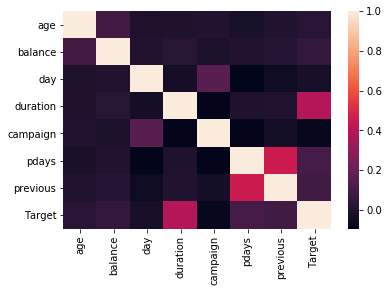

In [443]:
sns.heatmap(correlation)

##### Correlation between pdays and previous column is better where as all other independent columns has very less correlation
##### There are no strong linear relationships between any two variables except Target and duration


# Preparing the data for analytics

In [5]:
data.head()
data['Target']=data['Target'].astype('object')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Strategy: Removing the outliers from numerical columns
### Identifying the z-score for numerical columns

In [6]:
integers = data.columns[data.dtypes == 'int64']

for col in integers:
    col_z = col + '-z'
    data[col_z] = (data[col] - data[col].mean())/data[col].std(ddof=0) 

data.drop(['age','balance','day','duration','campaign','pdays','previous'],axis=1,inplace=True)

In [7]:
data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target,age-z,balance-z,day-z,duration-z,campaign-z,pdays-z,previous-z
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


In [8]:
#Checking the dtypes after obtaining z-score
data.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
poutcome       object
Target         object
age-z         float64
balance-z     float64
day-z         float64
duration-z    float64
campaign-z    float64
pdays-z       float64
previous-z    float64
dtype: object

### Changing the categorical variables to numerical representation


In [15]:
cleanup_nums = {
               "education":     {"primary": 1, "secondary": 2,"tertiary":3,"unknown":-1},
               "housing":     {"yes": 1, "no": 0},
               "loan":        {"yes": 1, "no": 0},
               "default":        {"yes": 1, "no": 0},
               "marital":     {"single": 1, "married": 2,"divorced":3},
               "poutcome":     {"success": 3, "other": 2,"unknown":-1,"failure":0},
               "contact":{"cellular": 1, "telephone": 2, "unknown": -1},
               "Target":{"1":1,"0":0}
                
                }
                
data.replace(cleanup_nums, inplace=True)

for categories in data.columns[data.columns=='object']:
    data[categories]=data[categories].astype("int32")

data.dtypes

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [10]:
data.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target,age-z,balance-z,day-z,duration-z,campaign-z,pdays-z,previous-z
0,management,2,3,0,1,0,-1,may,-1,no,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,technician,1,2,0,1,0,-1,may,-1,no,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,entrepreneur,2,2,0,1,1,-1,may,-1,no,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,blue-collar,2,-1,0,1,0,-1,may,-1,no,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,unknown,1,-1,0,0,0,-1,may,-1,no,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


### Removing all columns with z-score greater and lesser than 3 and -3 respectivley as the values are outliers


In [13]:
floats = data.columns[data.dtypes == 'float64']

for x in floats:
    indexNames_larger = data[ data[x]>3].index
    indexNames_lesser = data[ data[x]<-3].index
    # Delete these row indexes from dataFrame
    data.drop(indexNames_larger , inplace=True)
    data.drop(indexNames_lesser , inplace=True)
data.shape


(40209, 17)

In [14]:
categoricals=['month','job']

for cols in categoricals:
    data=pd.concat([data,pd.get_dummies(data[cols],prefix=cols)],axis=1)
    data.drop(cols,axis=1,inplace=True)

In [609]:
data['Target']=data['Target'].astype('category')

data.dtypes

marital                 int64
education               int64
default                 int64
housing                 int64
loan                    int64
contact                 int64
poutcome                int64
Target               category
age-z                 float64
balance-z             float64
day-z                 float64
duration-z            float64
campaign-z            float64
pdays-z               float64
previous-z            float64
month_apr               uint8
month_aug               uint8
month_dec               uint8
month_feb               uint8
month_jan               uint8
month_jul               uint8
month_jun               uint8
month_mar               uint8
month_may               uint8
month_nov               uint8
month_oct               uint8
month_sep               uint8
job_admin.              uint8
job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-e

## Preparing the independent and target variables as X and Y
### Dropping the independent parameters which are not of much significance


In [610]:
import imblearn
X=data.drop(['Target','duration-z'],axis=1)
Target_Variable=data['Target']
Y=Target_Variable
X.head()


,marital,education,default,housing,loan,contact,poutcome,age-z,balance-z,day-z,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,2,3,0,1,0,-1,-1,1.606965,0.256419,-1.298476,...,0,0,1,0,0,0,0,0,0,0
1,1,2,0,1,0,-1,-1,0.288529,-0.437895,-1.298476,...,0,0,0,0,0,0,0,1,0,0
2,2,2,0,1,1,-1,-1,-0.747384,-0.446762,-1.298476,...,1,0,0,0,0,0,0,0,0,0
3,2,-1,0,1,0,-1,-1,0.571051,0.047205,-1.298476,...,0,0,0,0,0,0,0,0,0,0
4,1,-1,0,0,0,-1,-1,-0.747384,-0.447091,-1.298476,...,0,0,0,0,0,0,0,0,0,1


In [611]:
Y=Y.astype("int32")

In [612]:
Y.head()
Y.value_counts()

0    36155
1     4054
Name: Target, dtype: int64

#### After removing outliers we have 36155 records who have not purchased term deposit and 4054 records which have purchased term deposits

### Split the data into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.

In [20]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=22)
print(Ytrain.value_counts())
print(Ytest.value_counts())

NameError: name 'X' is not defined

### Oversampling the training data to balance the Target column.

In [614]:
from imblearn.over_sampling import SMOTE

In [615]:
print("Before OverSampling, counts of label '1': {}".format(sum(Ytrain==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Ytrain==0)))

sm = SMOTE(random_state=2)
Xtrain_res, Ytrain_res = sm.fit_sample(Xtrain, Ytrain)

print('After OverSampling, the shape of train_X: {}'.format(Xtrain_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Ytrain_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Ytrain_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Ytrain_res==0)))


Before OverSampling, counts of label '1': 2784
Before OverSampling, counts of label '0': 25362 

After OverSampling, the shape of train_X: (50724, 37)
After OverSampling, the shape of train_y: (50724,) 

After OverSampling, counts of label '1': 25362
After OverSampling, counts of label '0': 25362


## Base Model- Logistic Regression

In [635]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression

In [636]:
model_log_regression=LogisticRegression(solver="liblinear")

In [637]:
model_log_regression.fit(Xtrain_res,Ytrain_res)
coef_df = pd.DataFrame(model_log_regression.coef_)
coef_df['intercept'] = model_log_regression.intercept_
print(coef_df)

          0         1        2         3         4         5         6  \
0 -0.441832  0.103514 -1.53198 -0.906973 -1.408802  0.537112  0.526954   

          7         8         9  ...       28        29        30        31  \
0 -0.094398 -0.037795 -0.016266  ... -6.02213 -4.650274 -4.221172 -5.624532   

         32        33        34        35        36  intercept  
0 -5.054474 -4.880938 -4.750914 -5.452242 -5.953859   9.854093  

[1 rows x 38 columns]


In [638]:
#Checking the score for logistic regression
logistic_regression_Trainscore=model_log_regression.score(Xtrain_res,Ytrain_res)
print("The score for Logistic regression-Training Data is {0:.2f}%".format(logistic_regression_Trainscore*100))
logistic_regression_Testscore=model_log_regression.score(Xtest,Ytest)
print("The score for Logistic regression-Test Data is {0:.2f}%".format(logistic_regression_Testscore*100))

The score for Logistic regression-Training Data is 81.08%
The score for Logistic regression-Test Data is 83.87%


In [639]:
#Predicting the Y values
Ypred=model_log_regression.predict(Xtest)

#Misclassification error
LR_MSE=1-logistic_regression_Testscore
print("Misclassification error of Logistical Regression model is {0:.1f}%".format(LR_MSE*100))

Misclassification error of Logistical Regression model is 16.1%


              precision    recall  f1-score   support

           0      0.936     0.879     0.907     10793
           1      0.325     0.492     0.391      1270

    accuracy                          0.839     12063
   macro avg      0.630     0.686     0.649     12063
weighted avg      0.872     0.839     0.853     12063



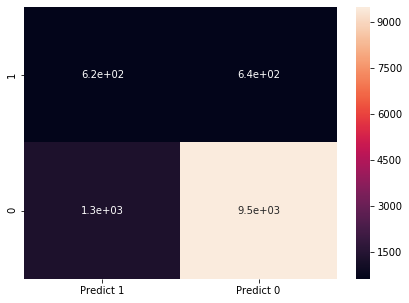

In [640]:
#Confusion Matrix
from sklearn import metrics
cm=metrics.confusion_matrix(Ytest, Ypred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
print(metrics.classification_report(Ytest, Ypred, digits=3))

# The confusion matrix

True Positives (TP): we correctly predicted that they have taken Term Deposit is 620

True Negatives (TN): we correctly predicted that they have not taken Term Deposit is 9500

False Positives (FP): we incorrectly predicted that have taken Term Deposit (a "Type I error") 1300 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not taken Term Deposit  (a "Type II error") 640 Falsely predict negative Type II error

In [641]:
accuracy_score=metrics.accuracy_score(Ytest,Ypred)
percision_score=metrics.precision_score(Ytest,Ypred)
recall_score=metrics.recall_score(Ytest,Ypred)
f1_score=metrics.f1_score(Ytest,Ypred)
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percission of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The F1 score of this model is {0:.2f}%".format(f1_score*100))

The Accuracy of this model is 83.87%
The Percission of this model is 32.45%
The Recall score of this model is 49.21%
The F1 score of this model is 39.11%


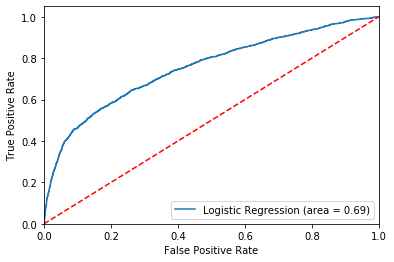

In [642]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Ytest, model_log_regression.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, model_log_regression.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [643]:
auc_score = metrics.roc_auc_score(Ytest, model_log_regression.predict_proba(Xtest)[:,1])
print("The AUC score is {0:.2f}".format(auc_score))

The AUC score is 0.75


### Logistic Regression Results:
#### The Accuracy of this model is 83.87%
#### The Percission of this model is 32.45%
#### The Recall score of this model is 49.21%
#### The F1 score of this model is 39.11%
#### The AUC Score of this model is 75%

## Base Model- Decision Tree Classifier

In [654]:
#Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier


In [655]:
#Going with Decision Tree classifier with gini criteria, max_depth is kept at 10 to avoid overfitting of data
dtc=DecisionTreeClassifier(criterion='gini',random_state = 22,max_depth=10, min_samples_leaf=3,max_leaf_nodes=None)


In [656]:
#Fitting the data
dtc.fit(Xtrain_res,Ytrain_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=22, splitter='best')

In [657]:
#Predicting the data
Ypred=dtc.predict(Xtest)

In [658]:
from sklearn import metrics

In [659]:
#Checking the score for Decision Tree Classifier
Decision_Tree_Trainscore=dtc.score(Xtrain_res,Ytrain_res)
print("The score for Decision Tree-Training Data is {0:.2f}%".format(Decision_Tree_Trainscore*100))
Decision_Tree_Testscore=dtc.score(Xtest,Ytest)
print("The score for Decision Tree-Test Data is {0:.2f}%".format(Decision_Tree_Testscore*100))

The score for Decision Tree-Training Data is 83.78%
The score for Decision Tree-Test Data is 85.92%


In [660]:
#Misclassification error
DTC_MSE=1-Decision_Tree_Testscore
print("Misclassification error of Decision Tree Classification model is {0:.1f}%".format(DTC_MSE*100))

Misclassification error of Decision Tree Classification model is 14.1%


In [661]:
accuracy_score=metrics.accuracy_score(Ytest,Ypred)
percision_score=metrics.precision_score(Ytest,Ypred)
recall_score=metrics.recall_score(Ytest,Ypred)
f1_score=metrics.f1_score(Ytest,Ypred)
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percission of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The F1 score of this model is {0:.2f}%".format(f1_score*100))

The Accuracy of this model is 85.92%
The Percission of this model is 36.35%
The Recall score of this model is 44.88%
The F1 score of this model is 40.17%


              precision    recall  f1-score   support

           0      0.933     0.908     0.920     10793
           1      0.364     0.449     0.402      1270

    accuracy                          0.859     12063
   macro avg      0.648     0.678     0.661     12063
weighted avg      0.873     0.859     0.866     12063



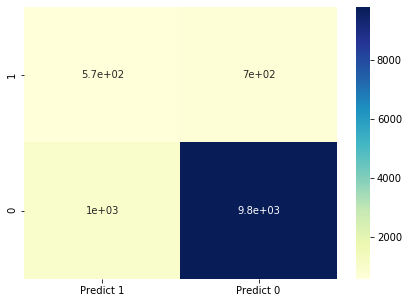

In [662]:
#Confusion Matrix
cm=metrics.confusion_matrix(Ytest, Ypred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu")
print(metrics.classification_report(Ytest, Ypred, digits=3))

##### The confusion matrix

True Positives (TP): we correctly predicted that they have taken Term Deposit is 570

True Negatives (TN): we correctly predicted that they have not taken Term Deposit is 9800

False Positives (FP): we incorrectly predicted that have taken Term Deposit (a "Type I error") 1000 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not taken Term Deposit  (a "Type II error") 700 Falsely predict negative Type II error

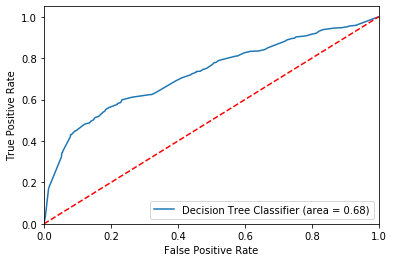

In [663]:
#AUC ROC curve

dtc_auc = roc_auc_score(Ytest, dtc.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, dtc.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier (area = %0.2f)' % dtc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('dtc_ROC')
plt.show()

In [477]:
## Calculating feature importance
feat_importance = dtc.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(X.columns, dtc.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
campaign-z,0.408257
housing,0.150826
poutcome,0.128818
day-z,0.064902
contact,0.048180
loan,0.036658
month_jul,0.026881
age-z,0.025053
month_aug,0.021386
month_nov,0.020394


#### From the feature importance dataframe we can infer that poutcome, month	are the variables that impact term depositors

In [664]:
auc_score = metrics.roc_auc_score(Ytest, dtc.predict_proba(Xtest)[:,1])
print("The AUC score is {0:.2f}".format(auc_score))

The AUC score is 0.72


### Decision Tree Results:
#### The Accuracy of this model is 85.92%
#### The Percission of this model is 36.35%
#### The Recall score of this model is 44.88%
#### The F1 score of this model is 40.17%
#### The AUC score of this model is 72%

## Ensemble Technique- Gradient Boosting

In [665]:
# Importing necessary libraries and fitting the data

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.2, random_state=22)
gb = gb.fit(Xtrain_res, Ytrain_res)
Ypred = gb.predict(Xtest)

In [666]:
Gradient_Booosting_Trainscore=gb.score(Xtrain_res,Ytrain_res)
print("The score for Gradient_Booosting-Training Data is {0:.2f}%".format(Gradient_Booosting_Trainscore*100))
Gradient_Booosting_Testscore=gb.score(Xtest,Ytest)
print("The score for Gradient_Booostinge-Test Data is {0:.2f}%".format(Gradient_Booosting_Testscore*100))

The score for Gradient_Booosting-Training Data is 90.00%
The score for Gradient_Booostinge-Test Data is 88.54%


In [667]:
#Misclassification error
GB_MSE=1-Gradient_Booosting_Testscore
print("Misclassification error of Gradient Boosting Classification model is {0:.1f}%".format(GB_MSE*100))

Misclassification error of Gradient Boosting Classification model is 11.5%


In [668]:
accuracy_score=metrics.accuracy_score(Ytest,Ypred)
percision_score=metrics.precision_score(Ytest,Ypred)
recall_score=metrics.recall_score(Ytest,Ypred)
f1_score=metrics.f1_score(Ytest,Ypred)
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percission of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The F1 score of this model is {0:.2f}%".format(f1_score*100))
print(metrics.classification_report(Ytest,Ypred))

The Accuracy of this model is 88.54%
The Percission of this model is 45.80%
The Recall score of this model is 48.11%
The F1 score of this model is 46.93%
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     10793
           1       0.46      0.48      0.47      1270

    accuracy                           0.89     12063
   macro avg       0.70      0.71      0.70     12063
weighted avg       0.89      0.89      0.89     12063



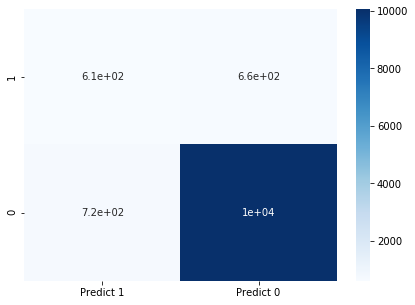

In [669]:
#Confusion Matrix
cm=metrics.confusion_matrix(Ytest, Ypred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="Blues")


# The confusion matrix

True Positives (TP): we correctly predicted that they have taken Term Deposit is 610

True Negatives (TN): we correctly predicted that they have not taken Term Deposit is 10000

False Positives (FP): we incorrectly predicted that have taken Term Deposit (a "Type I error") 720 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not taken Term Deposit  (a "Type II error") 660 Falsely predict negative Type II error

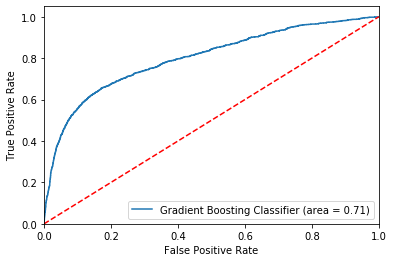

The AUC score is 0.80


In [670]:
#AUC ROC curve

gb_auc = roc_auc_score(Ytest, gb.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, gb.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % gb_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('gb_ROC')
plt.show()
auc_score = metrics.roc_auc_score(Ytest, gb.predict_proba(Xtest)[:,1])
print("The AUC score is {0:.2f}".format(auc_score))

### Gradient Boosting Results:

#### The Accuracy of this model is 88.54%
#### The Percission of this model is 45.80%
#### The Recall score of this model is 48.11%
#### The F1 score of this model is 46.93%


##### This is  better than the Decision tree as we are getting better F1 and AUC scores

## Ensemble Technique- Random Forest Classifier

In [671]:
# Importing libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

# Random Forest Classifier with gini critireon and max_depth of 150 to increase overfitting
kfold = model_selection.KFold(n_splits=10, random_state=22,shuffle=True)
rf = RandomForestClassifier(n_estimators = 100,criterion = 'gini', max_depth = 150, min_samples_leaf=1,class_weight='balanced')
rf = rf.fit(Xtrain_res, Ytrain_res)
results = model_selection.cross_val_score(rf, Xtrain_res, Ytrain_res, cv=kfold)
print(results)
Ypred = rf.predict(Xtest)


[0.94855115 0.9436231  0.94263749 0.94401735 0.94242902 0.94282334
 0.9384858  0.94124606 0.93947161 0.93986593]


In [672]:
Random_Forest_Trainscore=rf.score(Xtrain_res,Ytrain_res)
print("The score for Random Forest-Training Data is {0:.2f}%".format(Random_Forest_Trainscore*100))
Random_Forest_Testscore=rf.score(Xtest,Ytest)
print("The score for Random Forest-Test Data is {0:.2f}%".format(Random_Forest_Testscore*100))

The score for Random Forest-Training Data is 100.00%
The score for Random Forest-Test Data is 88.99%


In [673]:
#Misclassification error
RF_MSE=1-Random_Forest_Testscore
print("Misclassification error of Random Forest Classification model is {0:.1f}%".format(RF_MSE*100))

Misclassification error of Random Forest Classification model is 11.0%


In [675]:
accuracy_score=metrics.accuracy_score(Ytest,Ypred)
percision_score=metrics.precision_score(Ytest,Ypred)
recall_score=metrics.recall_score(Ytest,Ypred)
f1_score=metrics.f1_score(Ytest,Ypred)
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percission of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The F1 score of this model is {0:.2f}%".format(f1_score*100))
print(metrics.classification_report(Ytest,Ypred))

The Accuracy of this model is 88.99%
The Percission of this model is 47.32%
The Recall score of this model is 40.31%
The F1 score of this model is 43.54%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10793
           1       0.47      0.40      0.44      1270

    accuracy                           0.89     12063
   macro avg       0.70      0.68      0.69     12063
weighted avg       0.88      0.89      0.89     12063



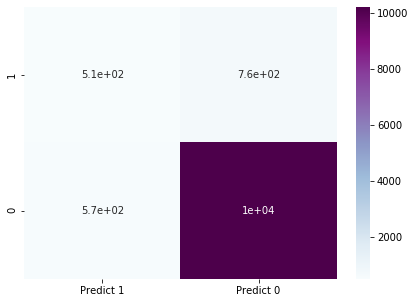

In [676]:
#Confusion Matrix
cm=metrics.confusion_matrix(Ytest, Ypred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="BuPu")

# The confusion matrix

True Positives (TP): we correctly predicted that they have taken Term Deposit is 510

True Negatives (TN): we correctly predicted that they have not taken Term Deposit is 10000

False Positives (FP): we incorrectly predicted that have taken Term Deposit (a "Type I error") 570 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not taken Term Deposit  (a "Type II error") 760 Falsely predict negative Type II error

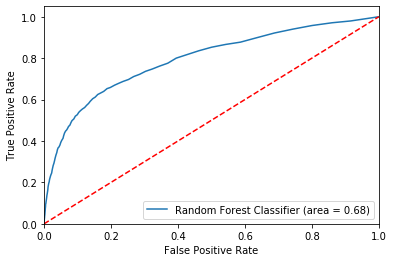

The AUC score is 0.79


In [677]:
#AUC ROC curve

rf_auc = roc_auc_score(Ytest, rf.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, rf.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('rf_ROC')
plt.show()
auc_score = metrics.roc_auc_score(Ytest, rf.predict_proba(Xtest)[:,1])
print("The AUC score is {0:.2f}".format(auc_score))



### Random Forest Classifier Results:

#### The Accuracy of this model is 88.99%
#### The Percission of this model is 47.32%
#### The Recall score of this model is 40.31%
#### The F1 score of this model is 43.43%
#### The AUC score for this model is 79%


##### This is  better than the Decision tree but bit lower than gradient boosting.

## Ensemble Technique- Bagging Classifier

In [679]:
# Importing libraries
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier(n_estimators=100, max_samples= .9, bootstrap=True, oob_score=True, random_state=22)
bg = bg.fit(Xtrain_res, Ytrain_res)
Ypred = bg.predict(Xtest)


In [680]:
Bagging_Trainscore=bg.score(Xtrain_res, Ytrain_res)
print("The score for Bagging-Training Data is {0:.2f}%".format(Bagging_Trainscore*100))
Bagging_Testscore=bg.score(Xtest,Ytest)
print("The score for Bagging-Test Data is {0:.2f}%".format(Bagging_Testscore*100))

The score for Bagging-Training Data is 99.99%
The score for Bagging-Test Data is 88.62%


In [681]:
#Misclassification error
BG_MSE=1-Bagging_Testscore
print("Misclassification error of Bagging Classification model is {0:.1f}%".format(BG_MSE*100))

Misclassification error of Bagging Classification model is 11.4%


In [682]:
accuracy_score=metrics.accuracy_score(Ytest,Ypred)
percision_score=metrics.precision_score(Ytest,Ypred)
recall_score=metrics.recall_score(Ytest,Ypred)
f1_score=metrics.f1_score(Ytest,Ypred)
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percission of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The F1 score of this model is {0:.2f}%".format(f1_score*100))
print(metrics.classification_report(Ytest,Ypred))

The Accuracy of this model is 88.62%
The Percission of this model is 44.88%
The Recall score of this model is 35.51%
The F1 score of this model is 39.65%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10793
           1       0.45      0.36      0.40      1270

    accuracy                           0.89     12063
   macro avg       0.69      0.65      0.67     12063
weighted avg       0.88      0.89      0.88     12063



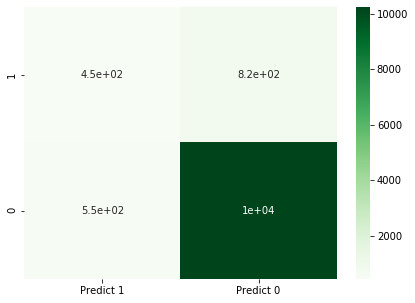

In [683]:
#Confusion Matrix
cm=metrics.confusion_matrix(Ytest, Ypred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="Greens")




# The confusion matrix

True Positives (TP): we correctly predicted that they have taken Term Deposit is 450

True Negatives (TN): we correctly predicted that they have not taken Term Deposit is 10000

False Positives (FP): we incorrectly predicted that have taken Term Deposit (a "Type I error") 550 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not taken Term Deposit  (a "Type II error") 820 Falsely predict negative Type II error

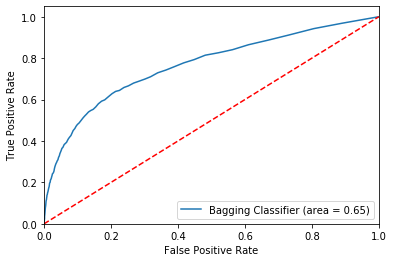

The AUC score is 0.76


In [684]:
#AUC ROC curve

bg_auc = roc_auc_score(Ytest, bg.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, bg.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging Classifier (area = %0.2f)' % bg_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('bg_ROC')
plt.show()
auc_score = metrics.roc_auc_score(Ytest, bg.predict_proba(Xtest)[:,1])
print("The AUC score is {0:.2f}".format(auc_score))

### Bagging Classifier Results:

#### The Accuracy of this model is 88.62%
#### The Percission of this model is 44.88%
#### The Recall score of this model is 35.51%
#### The F1 score of this model is 39.65%
#### The AUC score of this model is 76%

##### This is not better than the Decision tree, Random Forest and gradient boosting as we are getting less AUC and F1 scores

## Ensemble Technique- AdaBoost Classifier

In [685]:
#Importing necessary libraries
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(n_estimators= 100, learning_rate=0.5, random_state=22)
ab = ab.fit(Xtrain_res, Ytrain_res)

In [686]:
Ypred=ab.predict(Xtest)

In [687]:
Adaboosting_Trainscore=ab.score(Xtrain_res,Ytrain_res)
print("The score for Adaboosting-Training Data is {0:.2f}%".format(Adaboosting_Trainscore*100))
Adaboosting_Testscore=ab.score(Xtest,Ytest)
print("The score for Adaboosting-Test Data is {0:.2f}%".format(Adaboosting_Testscore*100))

The score for Adaboosting-Training Data is 83.60%
The score for Adaboosting-Test Data is 84.57%


In [688]:
#Misclassification error
AB_MSE=1-Adaboosting_Testscore
print("Misclassification error of Bagging Classification model is {0:.1f}%".format(AB_MSE*100))

Misclassification error of Bagging Classification model is 15.4%


In [689]:
accuracy_score=metrics.accuracy_score(Ytest,Ypred)
percision_score=metrics.precision_score(Ytest,Ypred)
recall_score=metrics.recall_score(Ytest,Ypred)
f1_score=metrics.f1_score(Ytest,Ypred)
print("The Accuracy of this model is {0:.2f}%".format(accuracy_score*100))
print("The Percission of this model is {0:.2f}%".format(percision_score*100))
print("The Recall score of this model is {0:.2f}%".format(recall_score*100))
print("The F1 score of this model is {0:.2f}%".format(f1_score*100))
print(metrics.classification_report(Ytest,Ypred))

The Accuracy of this model is 84.57%
The Percission of this model is 34.85%
The Recall score of this model is 53.54%
The F1 score of this model is 42.22%
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     10793
           1       0.35      0.54      0.42      1270

    accuracy                           0.85     12063
   macro avg       0.65      0.71      0.67     12063
weighted avg       0.88      0.85      0.86     12063



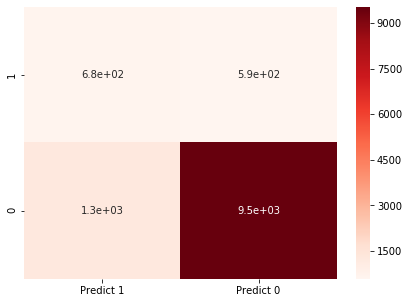

In [690]:
#Confusion Matrix
cm=metrics.confusion_matrix(Ytest, Ypred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap="Reds")

###### The confusion matrix

True Positives (TP): we correctly predicted that they have taken Term Deposit is 680

True Negatives (TN): we correctly predicted that they have not taken Term Deposit is 9500

False Positives (FP): we incorrectly predicted that have taken Term Deposit (a "Type I error") 1300 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they have not taken Term Deposit  (a "Type II error") 590 Falsely predict negative Type II error

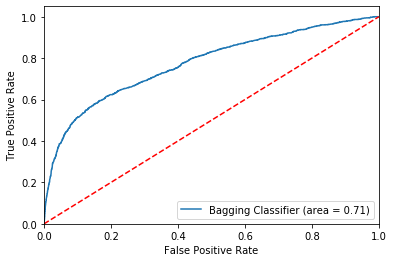

The AUC score is 0.77


In [691]:
#AUC ROC curve

ab_auc = roc_auc_score(Ytest, ab.predict(Xtest))
fpr, tpr, thresholds = roc_curve(Ytest, ab.predict_proba(Xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging Classifier (area = %0.2f)' % ab_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('ab_ROC')
plt.show()
auc_score = metrics.roc_auc_score(Ytest, ab.predict_proba(Xtest)[:,1])
print("The AUC score is {0:.2f}".format(auc_score))

### Adaboosting Classifier Results:

#### The Accuracy of this model is 84.57%
#### The Percission of this model is 34.85%
#### The Recall score of this model is 53.54%
#### The F1 score of this model is 42.22%
#### The AUC score is 77%